In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('E:\Desktop\Datasets\concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [5]:
df.shape

(1030, 9)

In [6]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Data Cleaning

In [9]:
#check duplicates
df.duplicated().sum()

25

In [10]:
dub=df.duplicated()
df[dub]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [11]:
df.shape

(1030, 9)

In [12]:
df.drop_duplicates(inplace=True) #completely remove the duplicates from the dataframe

In [13]:
df.shape

(1005, 9)

In [14]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

<AxesSubplot:>

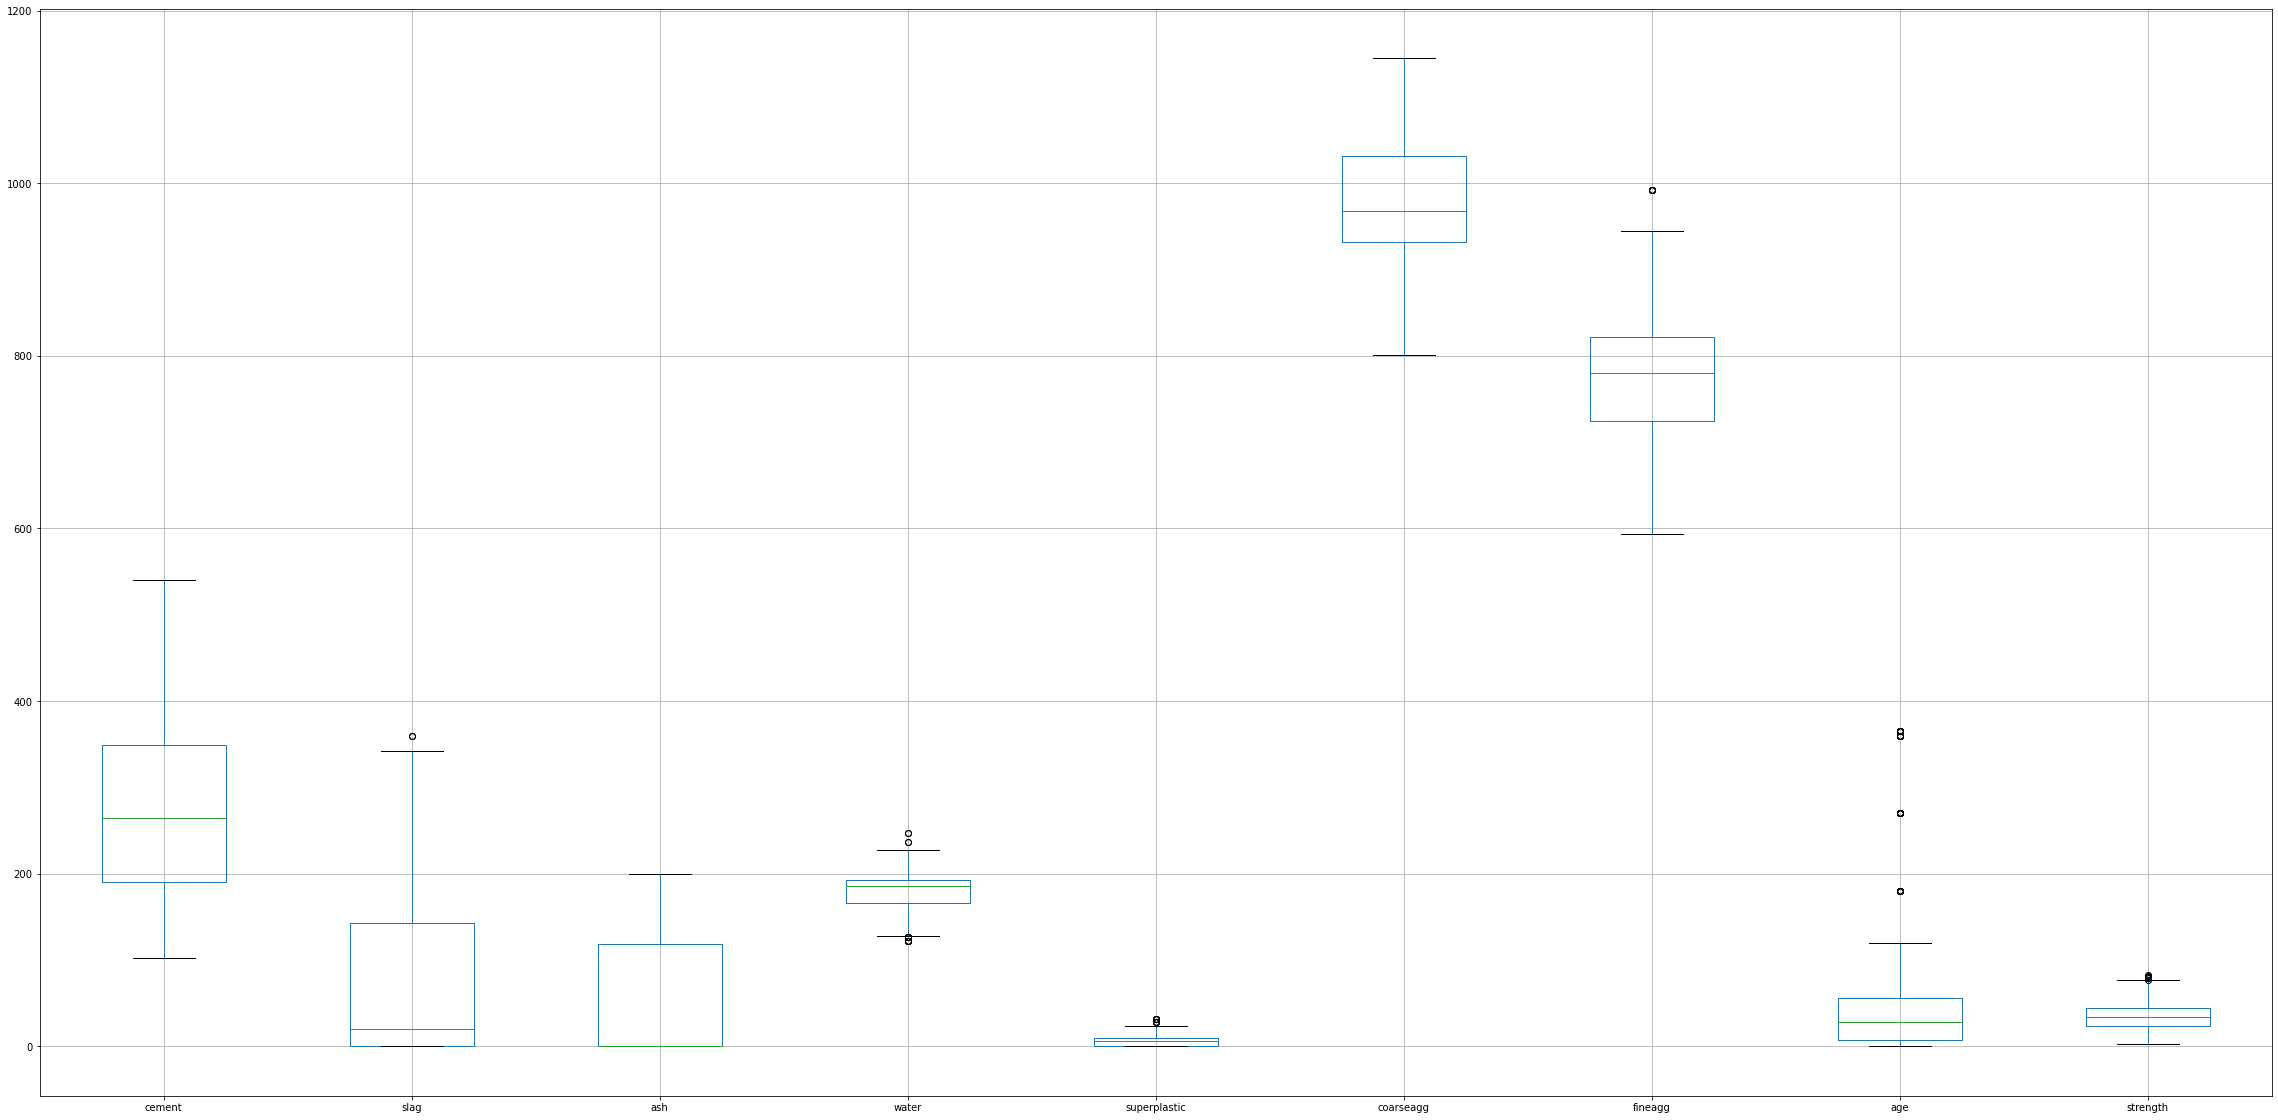

In [15]:
#outliers
df.boxplot(column=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],figsize=(40,20))

## outliers detection by IQR

In [16]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64

In [17]:
type(IQR)

pandas.core.series.Series

In [18]:
for i in IQR:
    print(i)

158.3
142.5
118.3
26.30000000000001
10.0
99.0
97.90000000000009
49.0
21.349999999999998


In [19]:
IQR_List=list(IQR)

In [20]:
#outliers detection function...(by IQR)
def detectOutliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    li=df.index[(df[col]>upper_limit)|(df[col]<lower_limit)]
    print(li)
    return li #return list of indexes of outliers....

In [21]:
#detectOutliers(df,'age')
print(df.index)
print(df.shape)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029],
           dtype='int64', length=1005)
(1005, 9)


In [22]:
print(detectOutliers(df,'water'))

Int64Index([33, 66, 129, 263, 432, 447, 462, 504, 584, 587, 740, 789, 826, 857,
            914],
           dtype='int64')
Int64Index([33, 66, 129, 263, 432, 447, 462, 504, 584, 587, 740, 789, 826, 857,
            914],
           dtype='int64')


In [23]:
df2=df.reset_index()
df2.drop('index', inplace=True, axis=1)
df2.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1000,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1001,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1002,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1003,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1004,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [36]:
a=list(detectOutliers(df2,'age'))
for i in a:
    df2.loc[i,'age'] = df2['age'].median()

Int64Index([  51,   64,   93,   99,  103,  133,  144,  149,  152,  157,  159,
             198,  199,  207,  256,  262,  270,  296,  300,  310,  311,  321,
             357,  359,  368,  391,  444,  460,  477,  528,  559,  568,  581,
             588,  606,  608,  609,  618,  628,  682,  699,  706,  707,  738,
             739,  759,  832,  843,  860,  879,  880,  898,  928,  934,  947,
             961,  970,  992, 1003],
           dtype='int64')


In [39]:
s=list(detectOutliers(df2,'slag'))
for i in s:
    df2.loc[i,'slag'] = df2['slag'].median()

Int64Index([897, 966], dtype='int64')


In [40]:
w=list(detectOutliers(df2,'water'))
for i in w:
    df2.loc[i,'water'] = df2['water'].median()

Int64Index([33, 66, 129, 263, 428, 443, 458, 496, 571, 574, 724, 772, 809, 839,
            893],
           dtype='int64')


In [41]:
sp=list(detectOutliers(df2,'superplastic'))
for i in sp:
    df2.loc[i,'superplastic'] = df2['superplastic'].median()

Int64Index([44, 156, 232, 291, 527, 728, 799, 820, 932, 1001], dtype='int64')


In [42]:
f=list(detectOutliers(df2,'fineagg'))
for i in f:
    df2.loc[i,'fineagg'] = df2['fineagg'].median()

Int64Index([129, 443, 496, 571, 839], dtype='int64')


In [43]:
sg=list(detectOutliers(df2,'strength'))
for i in sg:
    df2.loc[i,'strength'] = df2['strength'].median()

Int64Index([190, 192, 245, 257, 498, 718, 927, 978], dtype='int64')


<AxesSubplot:>

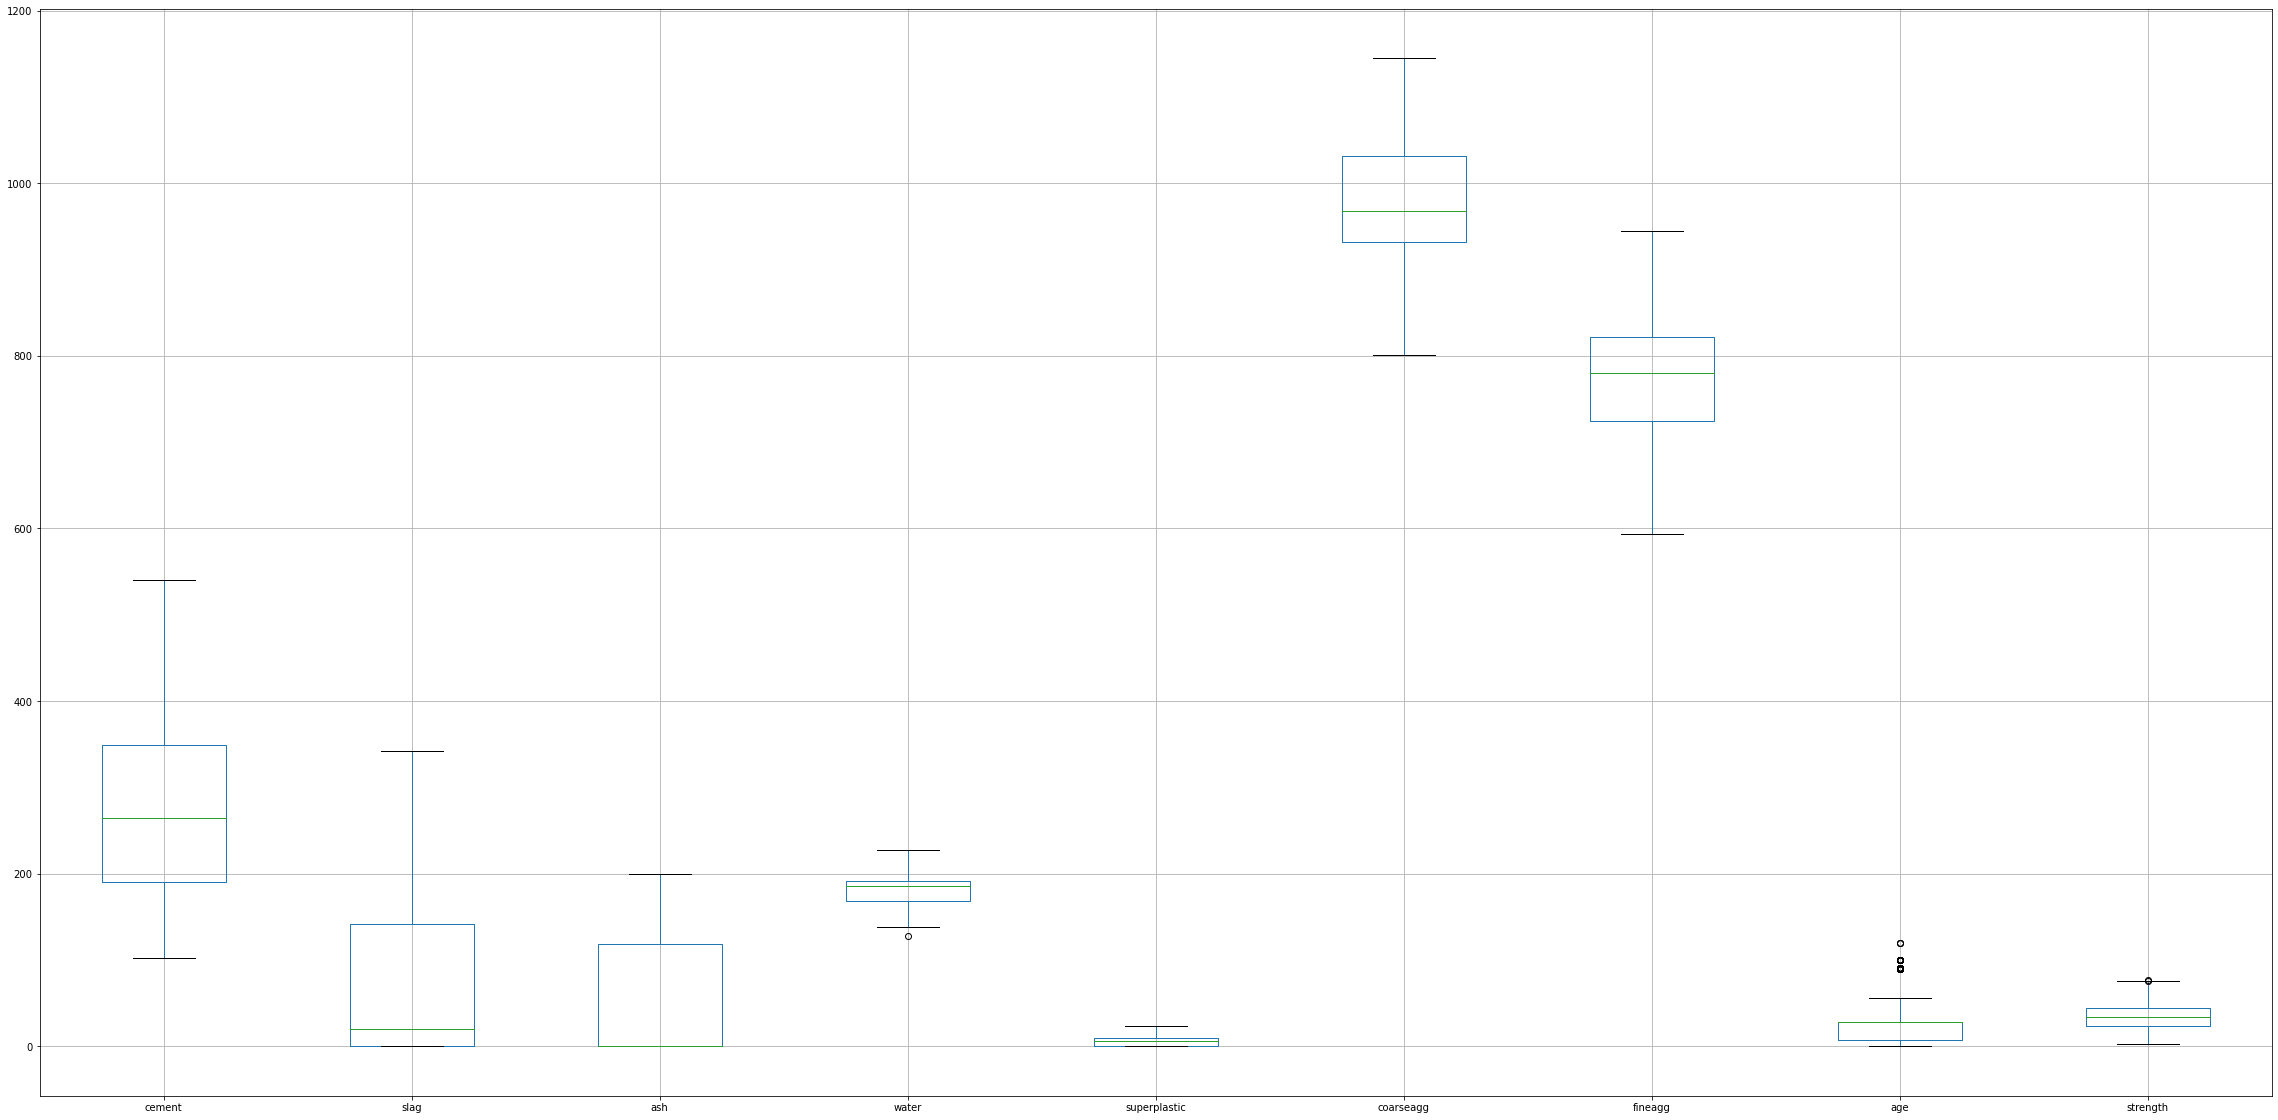

In [44]:
df2.boxplot(column=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
          'fineagg', 'age', 'strength'],figsize=(40,20))

In [45]:
a=list(detectOutliers(df2,'age'))
for i in a:
    df2.loc[i,'age'] = df2['age'].median()

Int64Index([  5,  15,  26,  27,  34,  44,  56,  59,  62,  67,
            ...
            925, 927, 929, 945, 956, 960, 967, 975, 983, 987],
           dtype='int64', length=126)


<AxesSubplot:>

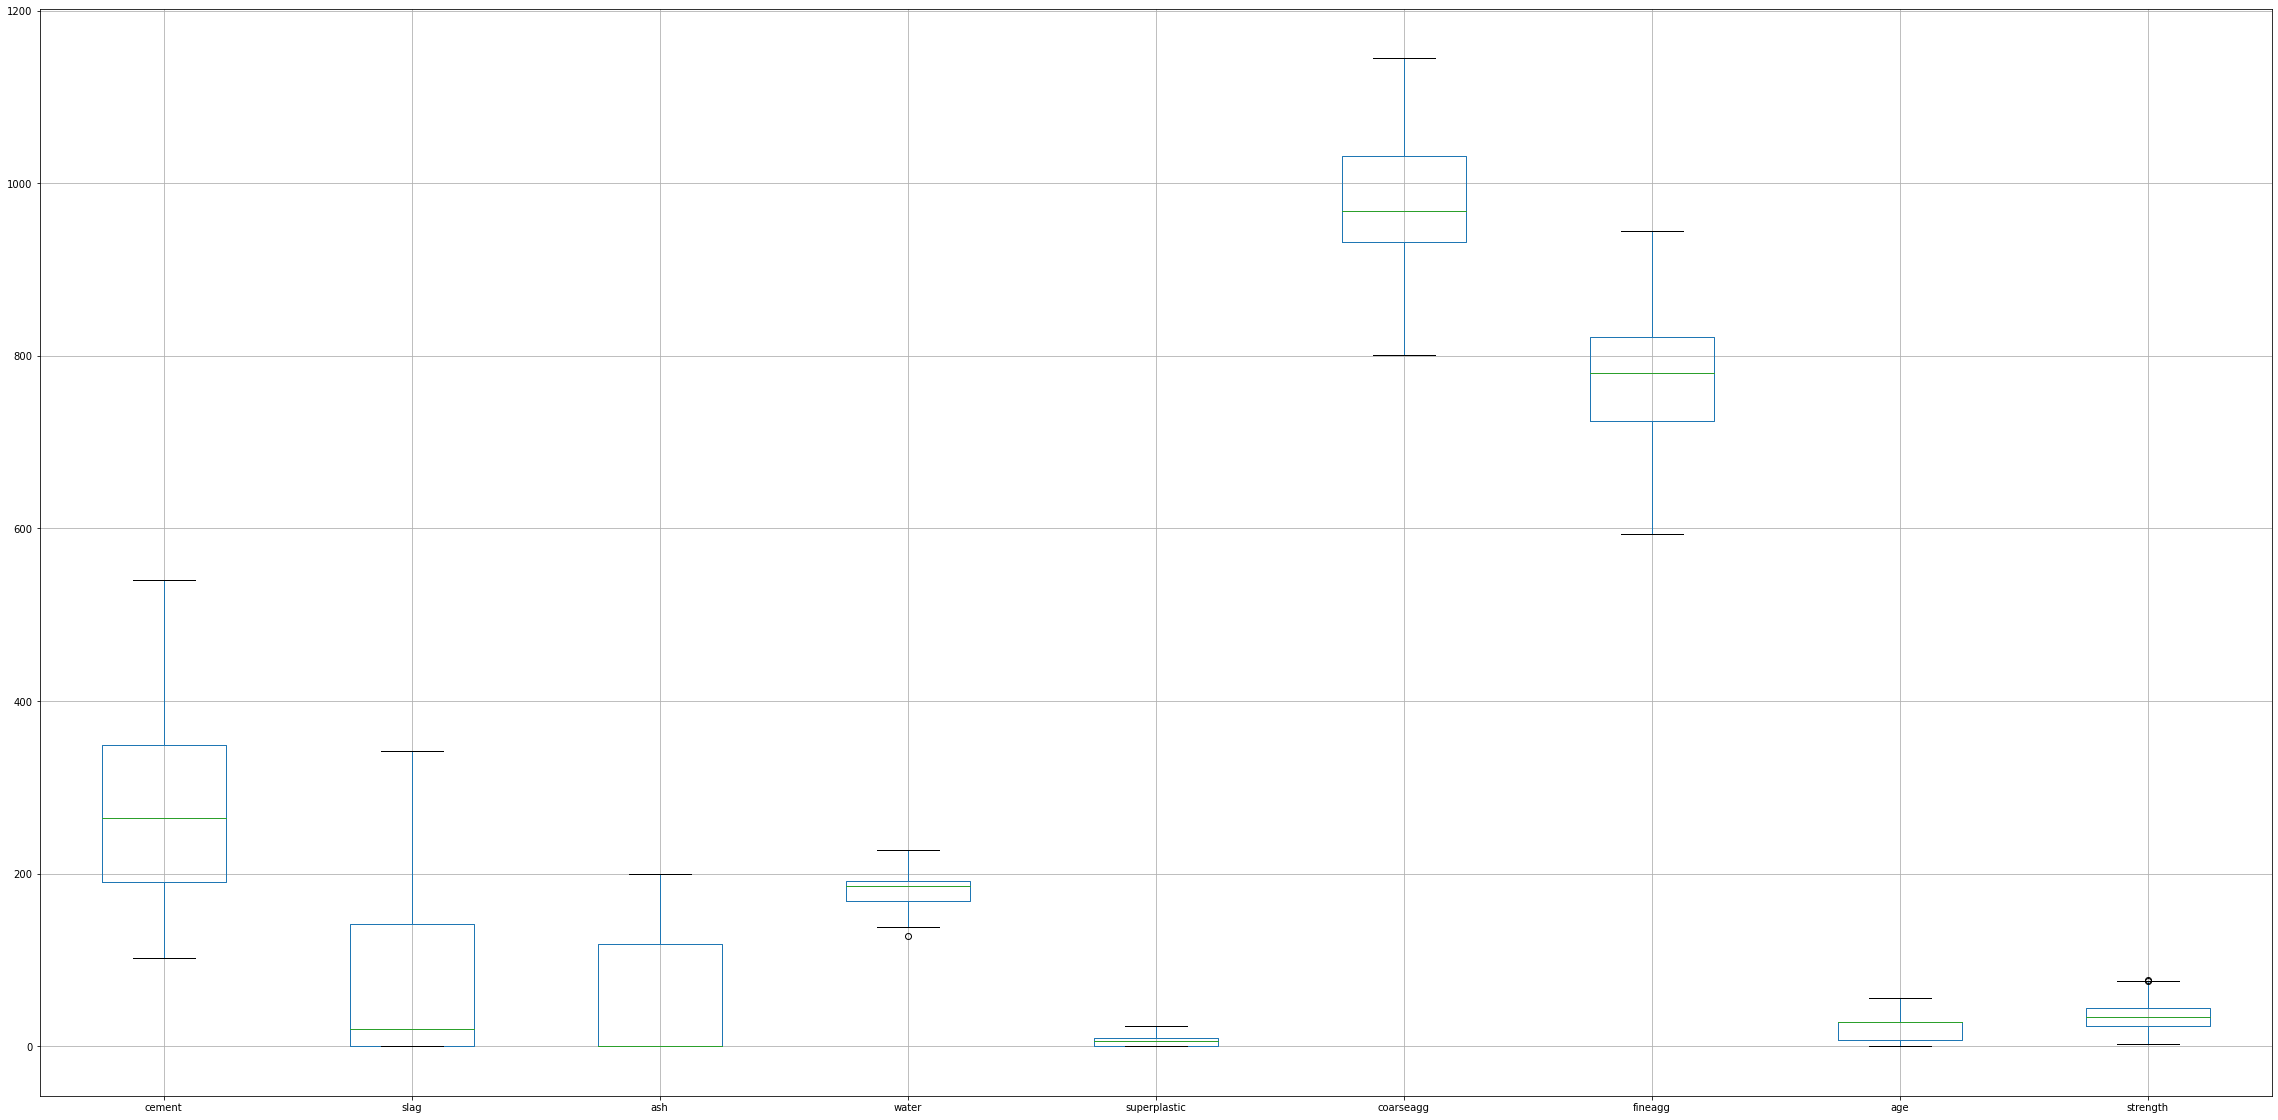

In [46]:
df2.boxplot(column=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
          'fineagg', 'age', 'strength'],figsize=(40,20))

In [47]:
w=list(detectOutliers(df2,'water'))
for i in w:
    df2.loc[i,'water'] = df2['water'].median()

Int64Index([838], dtype='int64')


<AxesSubplot:>

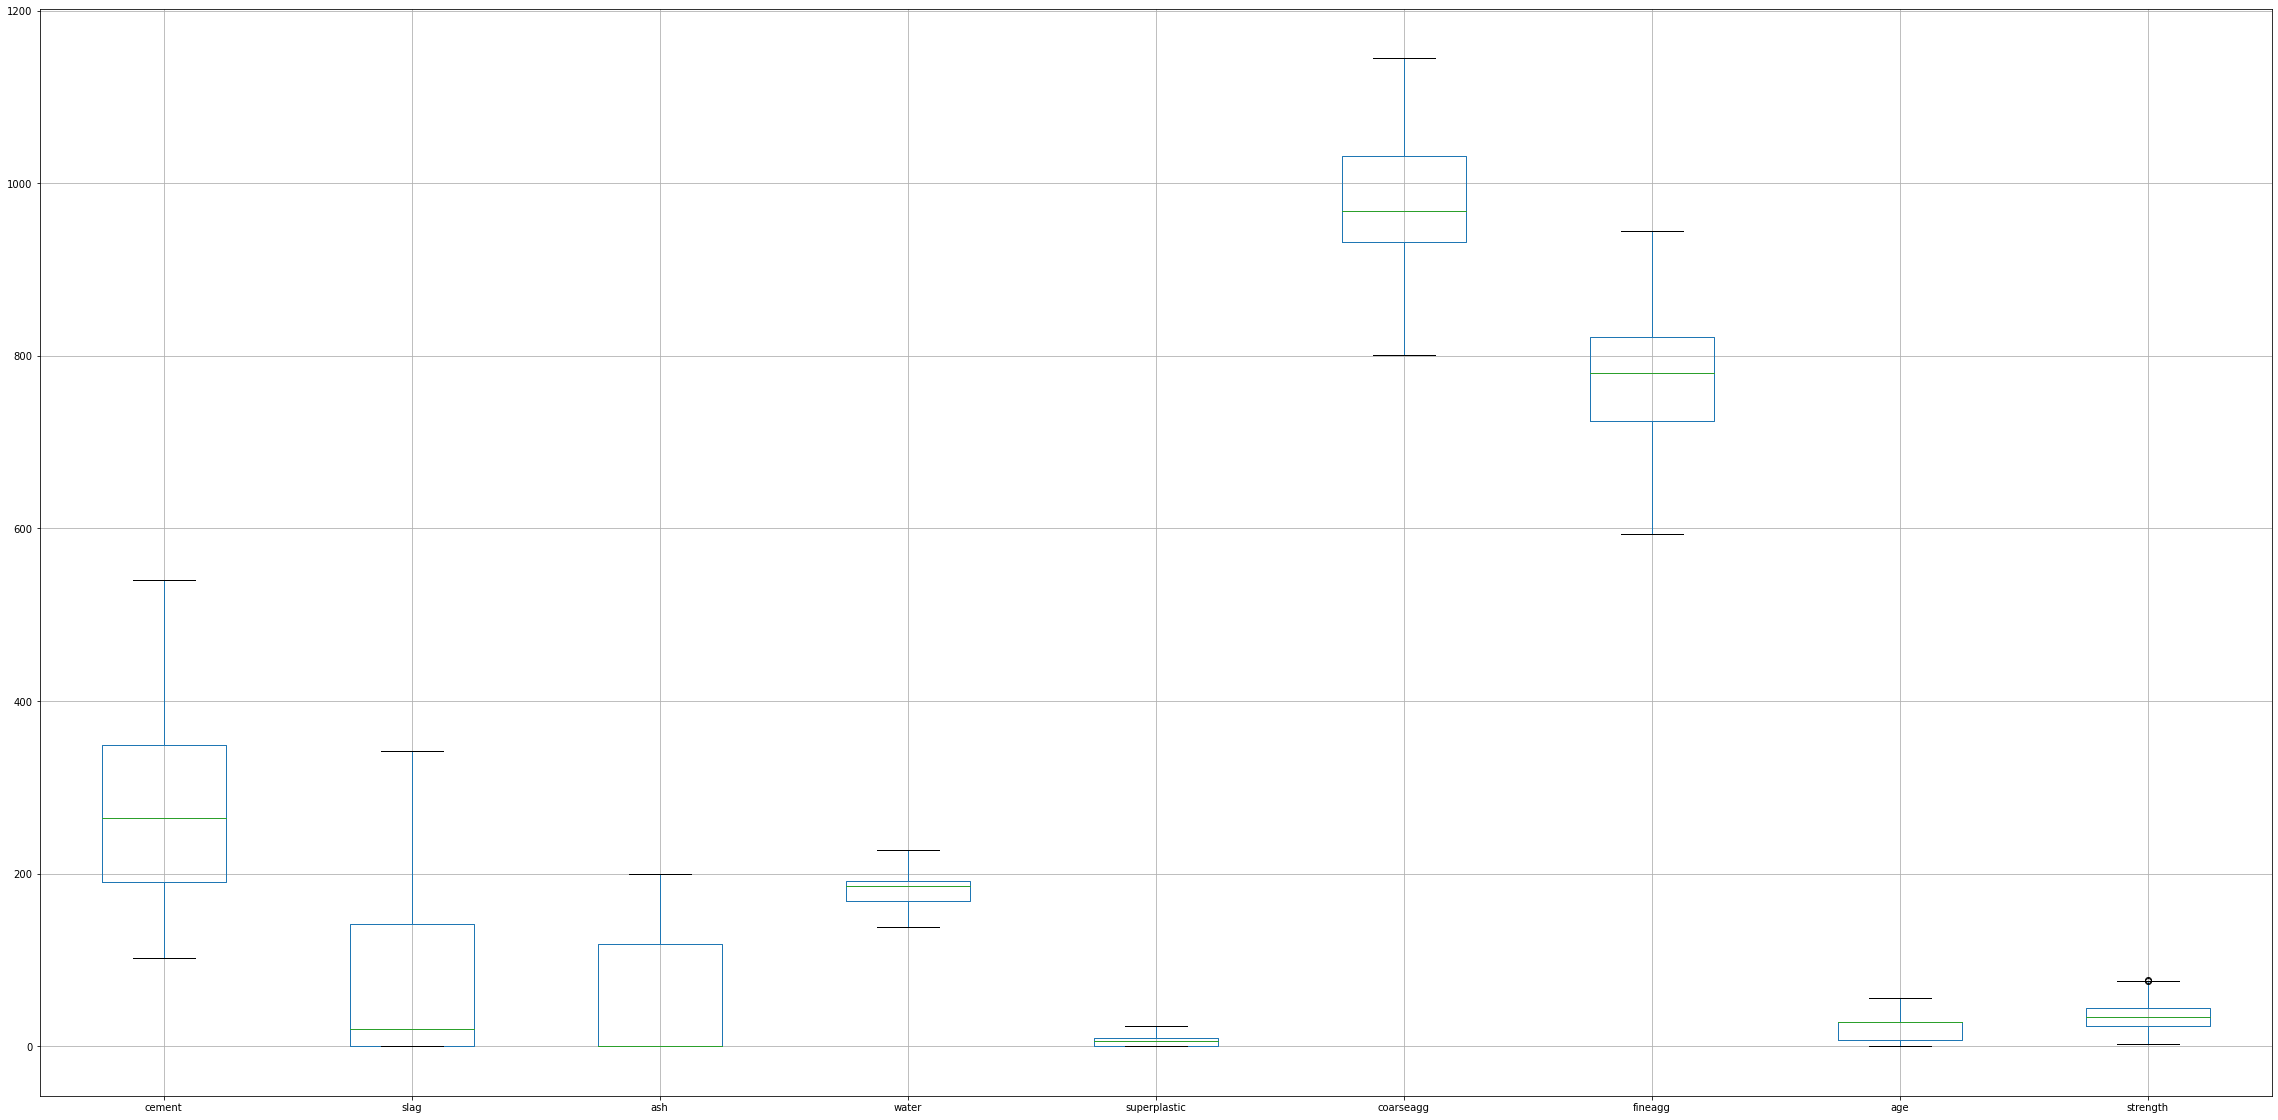

In [48]:
df2.boxplot(column=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
          'fineagg', 'age', 'strength'],figsize=(40,20))

In [49]:
sg=list(detectOutliers(df2,'strength'))
for i in sg:
    df2.loc[i,'strength'] = df2['strength'].median()

Int64Index([335, 484], dtype='int64')


<AxesSubplot:>

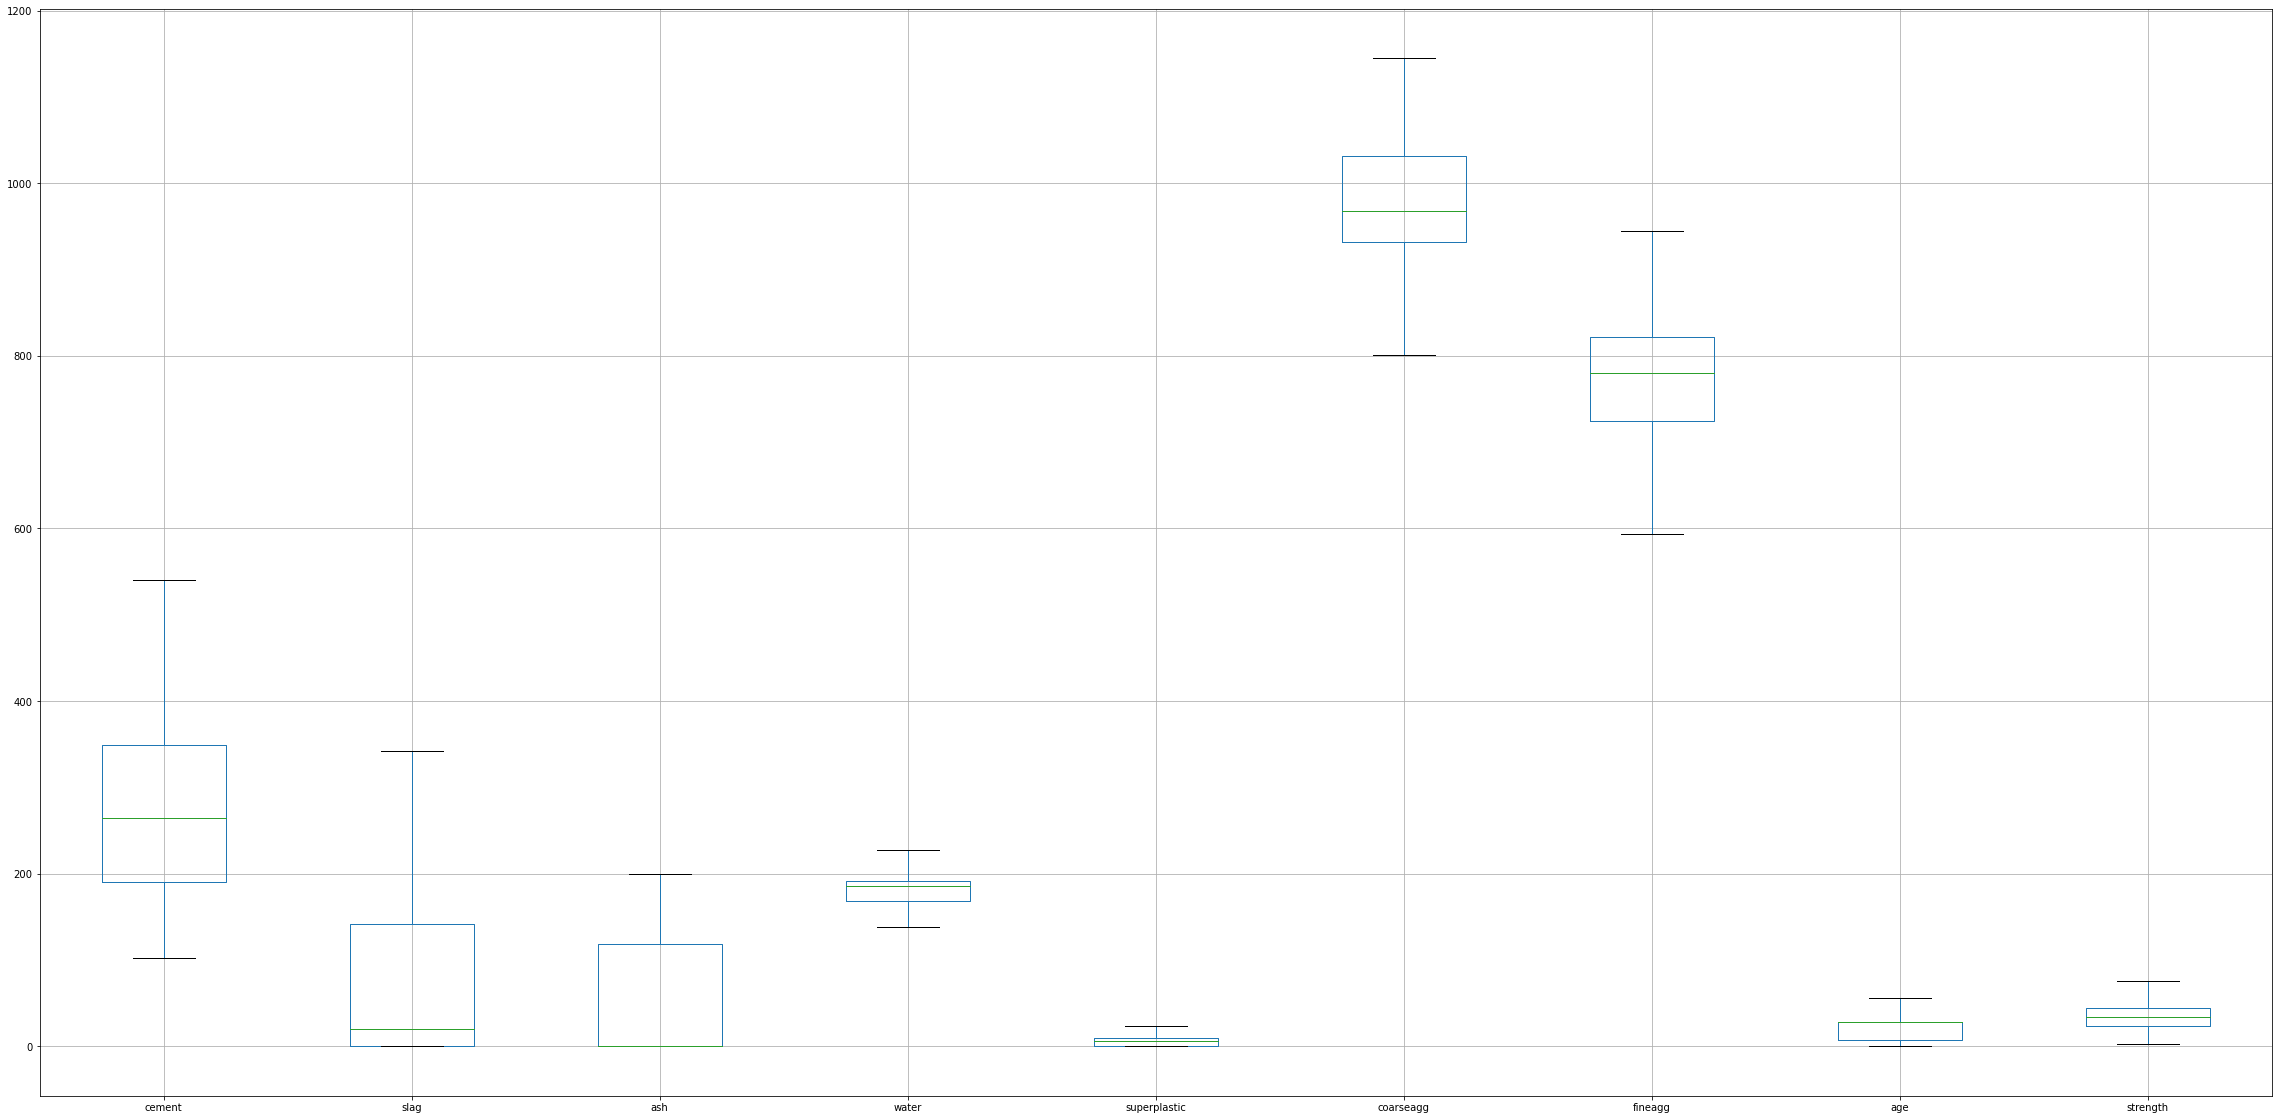

In [50]:
#after completely removing the outliers................
df2.boxplot(column=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
          'fineagg', 'age', 'strength'],figsize=(40,20))

In [51]:
df2.shape

(1005, 9)

In [52]:
#check for missing values...
df2.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [53]:
#variables define.....
x=df2.drop('strength',axis=1)

In [54]:
y=df2['strength']

In [55]:
x.shape

(1005, 8)

In [56]:
y.shape

(1005,)

In [57]:
#train,test split....
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model=LinearRegression()

In [60]:
#train the model...
model.fit(x_train,y_train)

LinearRegression()

In [61]:
#predict results..
y_pred=model.predict(x_test)

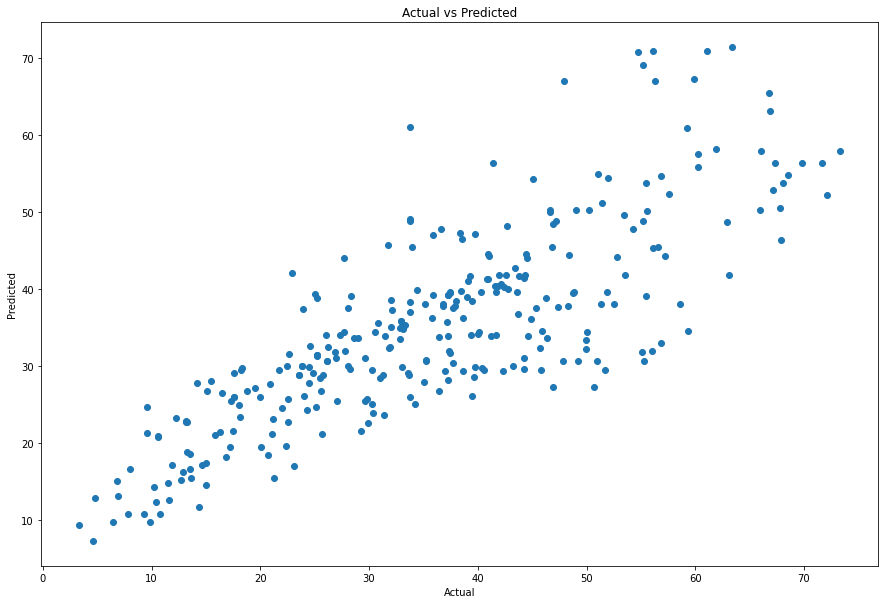

In [63]:
#ploting results..
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()



# Performance metrics 

In [72]:
#import libraries
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [66]:
#mean_absolute_error
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  7.124642482360651


In [67]:
#mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))

Mean Squared Error:  84.26230141457515


In [74]:
#root mean_squared_error
print("Root Mean Squared Error: ",math.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error:  9.179449951635181


In [68]:
#r^2 
print("R^2: ",r2_score(y_test,y_pred))

R^2:  0.6554281112145279
